In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_json("BiztelAI_DS_Dataset_Mar'25.json")

In [12]:
# Convert JSON structure to DataFrame
records = []
for conv_id, conv_data in df.items():
    article_url = conv_data.get("article_url", "")
    config = conv_data.get("config", "")
    conversation_rating = conv_data.get("conversation_rating", {})

    for message in conv_data.get("content", []):
        record = {
            "conversation_id": conv_id,
            "article_url": article_url,
            "config": config,
            "message": message.get("message", ""),
            "agent": message.get("agent", ""),
            "sentiment": message.get("sentiment", ""),
            "turn_rating": message.get("turn_rating", ""),
        }
        records.append(record)

df = pd.DataFrame(records)

# Dataset Summary
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  11760 non-null  object
 1   article_url      11760 non-null  object
 2   config           11760 non-null  object
 3   message          11760 non-null  object
 4   agent            11760 non-null  object
 5   sentiment        11760 non-null  object
 6   turn_rating      11760 non-null  object
dtypes: object(7)
memory usage: 643.3+ KB
None


In [13]:
# Top 5 Most Discussed Articles
article_summary = df["article_url"].value_counts().reset_index()
article_summary.columns = ["article_url", "num_conversations"]
print("\nTop 5 Most Discussed Articles:")
print(article_summary.head())


Top 5 Most Discussed Articles:
                                         article_url  num_conversations
0  https://www.washingtonpost.com/local/for-tom-b...               5032
1  https://www.washingtonpost.com/news/arts-and-e...                140
2  https://www.washingtonpost.com/news/fancy-stat...                113
3  https://www.washingtonpost.com/news/early-lead...                112
4  http://www.washingtonpost.com/sports/2018/10/0...                109


<ipython-input-14-c74c4b38513d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="agent", palette="coolwarm")


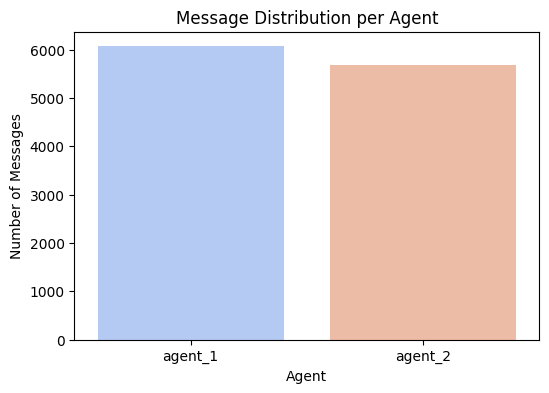

In [14]:
# Visualization 1: Number of Messages per Agent
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="agent", palette="coolwarm")
plt.xlabel("Agent")
plt.ylabel("Number of Messages")
plt.title("Message Distribution per Agent")
plt.show()

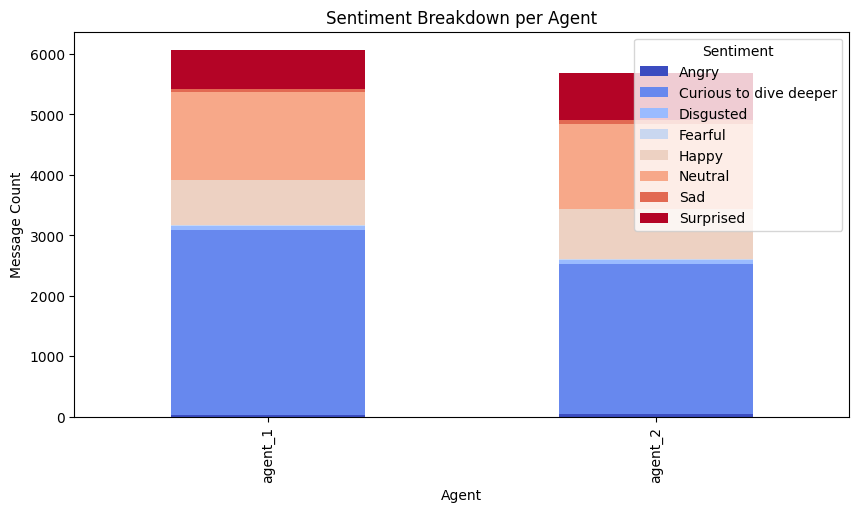

In [15]:
# Visualization 2: Sentiment Breakdown per Agent (Stacked Bar Chart)
sentiment_counts = df.groupby(["agent", "sentiment"]).size().unstack(fill_value=0)
sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")
plt.xlabel("Agent")
plt.ylabel("Message Count")
plt.title("Sentiment Breakdown per Agent")
plt.legend(title="Sentiment")
plt.show()

<ipython-input-16-fa0e3e3bd4eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=article_summary.index, x=article_summary.values, palette="viridis")


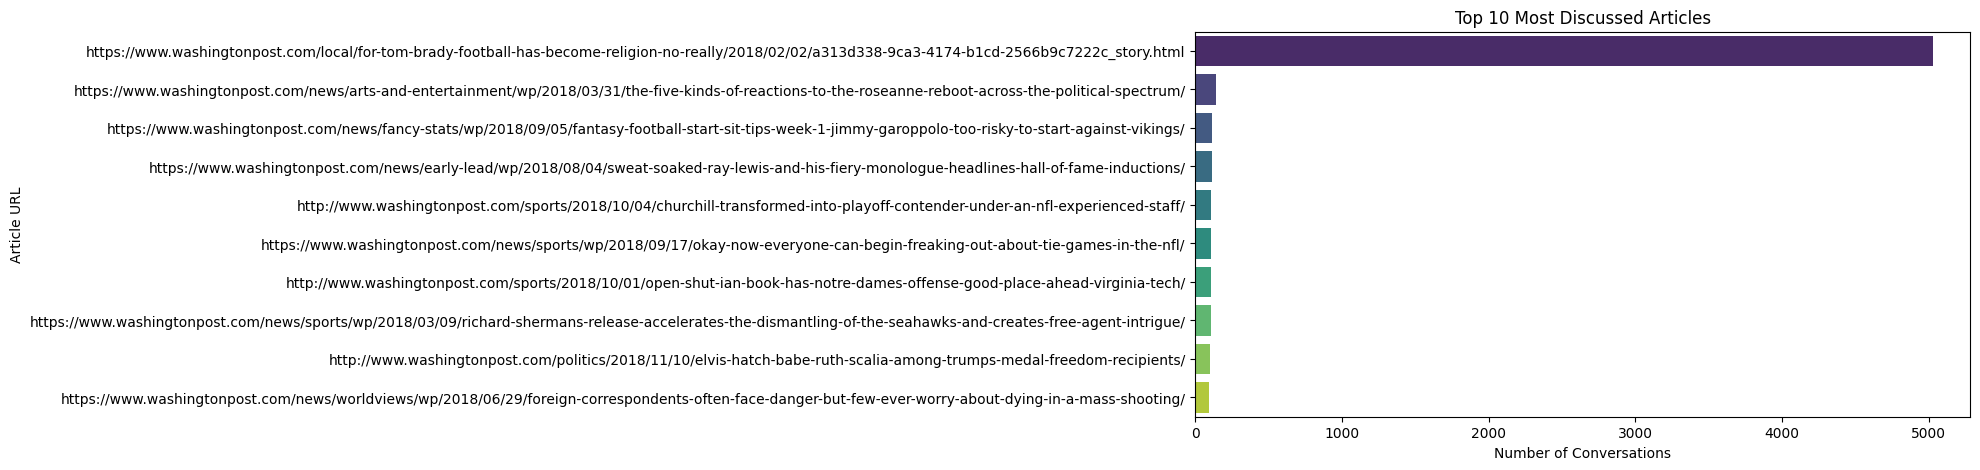

In [16]:
# Visualization 3: Most Discussed Articles (Top 10)
article_summary = df["article_url"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=article_summary.index, x=article_summary.values, palette="viridis")
plt.xlabel("Number of Conversations")
plt.ylabel("Article URL")
plt.title("Top 10 Most Discussed Articles")
plt.show()

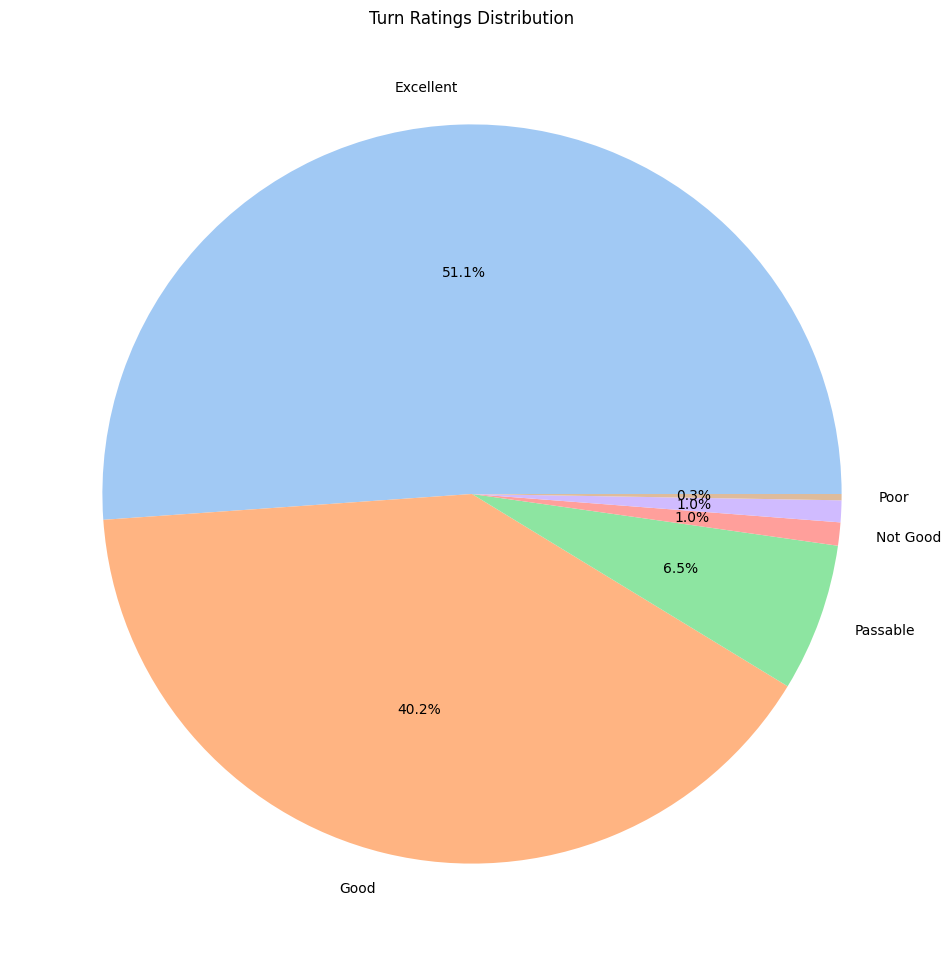

In [18]:
# Visualization 4: Turn Ratings Distribution (Pie Chart)
turn_rating_counts = df["turn_rating"].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(turn_rating_counts, labels=turn_rating_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Turn Ratings Distribution")
plt.show()